# ISLR Chapter 7 - End of Chapter Applied exercises code portion solutions¶

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions by Arthur Avila

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

### 6. In this exercise, you will further analyze the `Wage` data set considered throughout this chapter.

#### (a) Perform polynomial regression to predict `wage` using `age` . Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data.

In [138]:
Wage = pd.read_csv('Wage.csv', index_col=0)
y = Wage.wage
X = Wage.age.to_numpy().reshape(-1,1)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedKFold
import matplotlib.pyplot as plt

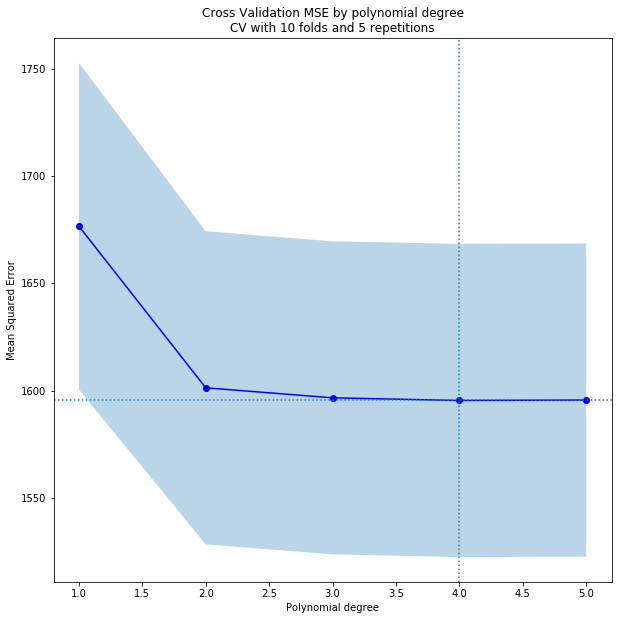

In [63]:
poly = PolynomialFeatures()
lm = LinearRegression()
pipe = Pipeline([
    ('poly' , poly),
    ('regress' , lm),
])


degrees = 5
folds = 10
rounds = 5
params = {'poly__degree':[i for i in range(1,degrees+1)]}

rkf = RepeatedKFold(folds,rounds,46542)
poly_lm_cv = GridSearchCV(pipe, params, scoring='neg_mean_squared_error', cv=rkf, iid=False)
poly_lm_cv.fit(X,y)

CV_MSE = -poly_lm_cv.cv_results_['mean_test_score']
CV_MSE_SD = poly_lm_cv.cv_results_['std_test_score']/np.sqrt(folds*rounds)
low, high = (CV_MSE - 2 * CV_MSE_SD, CV_MSE + 2 * CV_MSE_SD)

_ = plt.figure(figsize=(10,10))
_ = plt.fill_between(np.arange(1,degrees+1), low, high, alpha = 0.3)
_ = plt.plot(np.arange(1,degrees+1), CV_MSE, 'bo-')
_ = plt.axhline(CV_MSE.min(), linestyle='dotted')
_ = plt.axvline(poly_lm_cv.best_params_['poly__degree'], linestyle='dotted')
_ = plt.title(f'Cross Validation MSE by polynomial degree\nCV with {folds} folds and {rounds} repetitions')
_ = plt.ylabel('Mean Squared Error')
_ = plt.xlabel('Polynomial degree')
_ = plt.show()

In [70]:
models = []
for d in range(1,degrees+1):
    poly = PolynomialFeatures(d)
    models.append(sm.OLS(y,poly.fit_transform(X)).fit())

sm.stats.anova_lm(*models)

/home/arthur/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/arthur/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/arthur/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


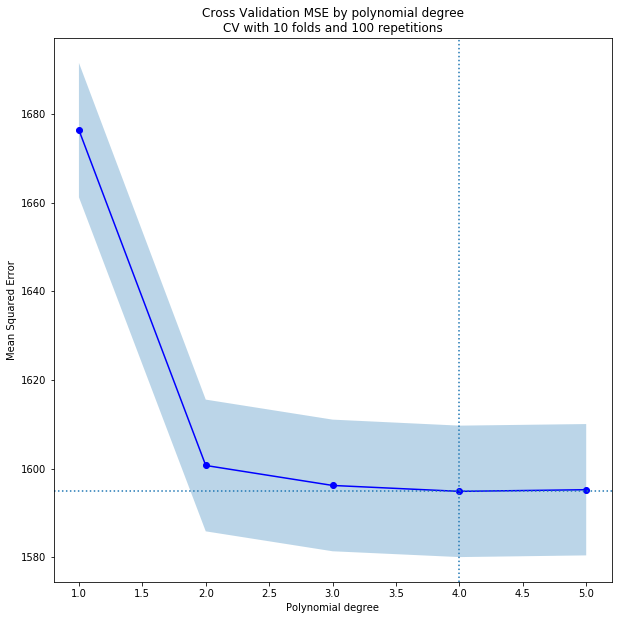

In [101]:
folds = 10
rounds = 100
rkf = RepeatedKFold(folds,rounds,46542)
poly_lm_cv = GridSearchCV(pipe, params, scoring='neg_mean_squared_error', cv=rkf, iid=False, n_jobs=3)
poly_lm_cv.fit(X,y)

CV_MSE = -poly_lm_cv.cv_results_['mean_test_score']
CV_MSE_SD = poly_lm_cv.cv_results_['std_test_score']/np.sqrt(folds*rounds)
low, high = (CV_MSE - 2 * CV_MSE_SD, CV_MSE + 2 * CV_MSE_SD)

_ = plt.figure(figsize=(10,10))
_ = plt.fill_between(np.arange(1,degrees+1), low, high, alpha = 0.3)
_ = plt.plot(np.arange(1,degrees+1), CV_MSE, 'bo-')
_ = plt.axhline(CV_MSE.min(), linestyle='dotted')
_ = plt.axvline(poly_lm_cv.best_params_['poly__degree'], linestyle='dotted')
_ = plt.title(f'Cross Validation MSE by polynomial degree\nCV with {folds} folds and {rounds} repetitions')
_ = plt.ylabel('Mean Squared Error')
_ = plt.xlabel('Polynomial degree')
_ = plt.show()

Unlike what happened in R, CV results were consistent adding repetitions of CV. Polunomial with degree 4 is borderline on F test, but chosen in CV.

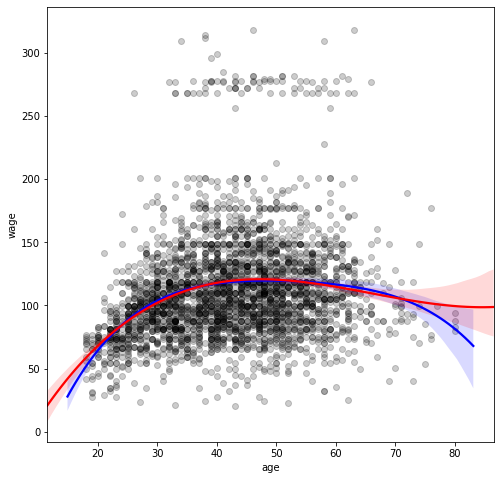

In [99]:
import seaborn as sns
_ = plt.figure(figsize=(8,8))
_ = sns.regplot(Wage.age, Wage.wage, order=4, 
                scatter_kws={'color':'black', 'alpha':0.2},
                line_kws={'color':'blue'})
_ = sns.regplot(Wage.age, Wage.wage, order=3, 
                scatter_kws={'color':'black', 'alpha':0},
                line_kws={'color':'red'})
plt.show()

#### (b) Fit a step function to predict `wage` using `age`, and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.

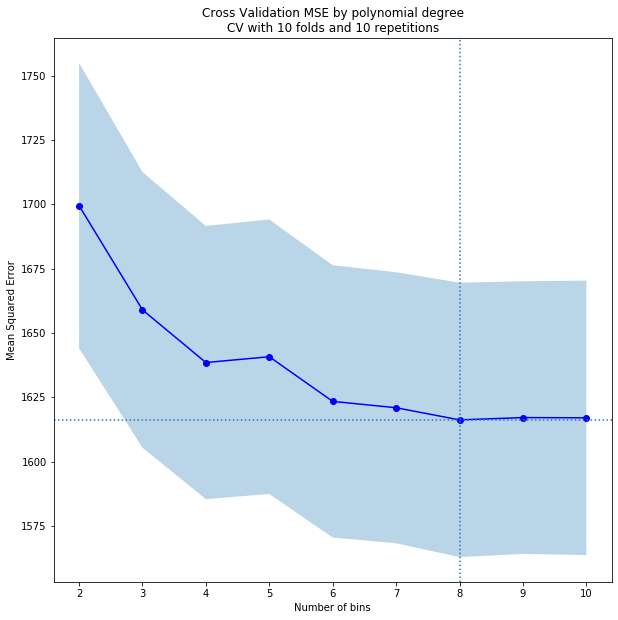

In [132]:
from sklearn.preprocessing import KBinsDiscretizer

cuts = KBinsDiscretizer()

pipe = Pipeline([
    ('cut',cuts),
    ('regress',lm)
])

folds = 10
rounds = 10

max_intervals = 10
params = {'cut__n_bins':[i for i in range(2,max_intervals+1)]}

rkf = RepeatedKFold(folds,rounds,46542)
cuts_lm_cv = GridSearchCV(pipe, params, scoring='neg_mean_squared_error', cv=rkf, iid=False, n_jobs=3)
cuts_lm_cv.fit(X,y)

CV_MSE = -cuts_lm_cv.cv_results_['mean_test_score']
CV_MSE_SD = cuts_lm_cv.cv_results_['std_test_score']/np.sqrt(folds*rounds)
low, high = (CV_MSE - 2 * CV_MSE_SD, CV_MSE + 2 * CV_MSE_SD)

_ = plt.figure(figsize=(10,10))
_ = plt.fill_between(np.arange(2,max_intervals+1), low, high, alpha = 0.3)
_ = plt.plot(np.arange(2,max_intervals+1), CV_MSE, 'bo-')
_ = plt.axhline(CV_MSE.min(), linestyle='dotted')
_ = plt.axvline(cuts_lm_cv.best_params_['cut__n_bins'], linestyle='dotted')
_ = plt.title(f'Cross Validation MSE by polynomial degree\nCV with {folds} folds and {rounds} repetitions')
_ = plt.ylabel('Mean Squared Error')
_ = plt.xlabel('Number of bins')
_ = plt.show()

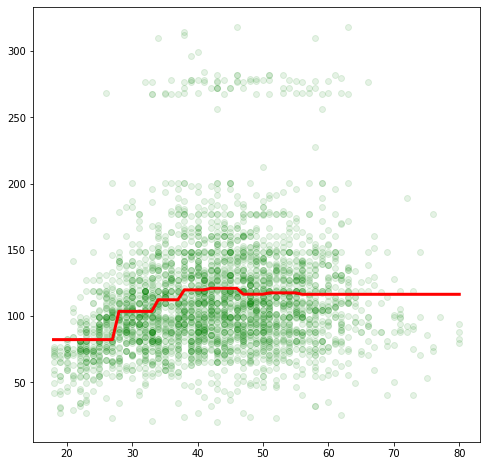

In [133]:
Xrange = np.arange(X.min(),X.max()+1)
y_fit = cuts_lm_cv.predict(Xrange.reshape(-1,1))

_ = plt.figure(figsize=(8,8))
_ = plt.scatter(x=Wage.age, y=Wage.wage, color='green', alpha=0.1)
_ = plt.plot(Xrange, y_fit, 'r-', linewidth=3)
_ = plt.show()

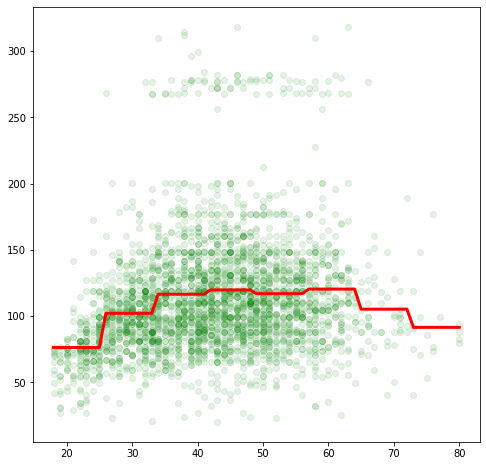

best parameters: {'cut__n_bins': 8, 'cut__strategy': 'uniform'}
best MSE: 1602.8143970305644


In [136]:
# allowing different binning strategies
params = {'cut__n_bins':[i for i in range(2,max_intervals+1)],
          'cut__strategy':['uniform','quantile','kmeans'],}

cuts_lm_cv = GridSearchCV(pipe, params, scoring='neg_mean_squared_error', cv=rkf, iid=False, n_jobs=3)
cuts_lm_cv.fit(X,y)

y_fit = cuts_lm_cv.predict(Xrange.reshape(-1,1))

_ = plt.figure(figsize=(8,8))
_ = plt.scatter(x=Wage.age, y=Wage.wage, color='green', alpha=0.1)
_ = plt.plot(Xrange, y_fit, 'r-', linewidth=3)
_ = plt.show()

print('best parameters:',cuts_lm_cv.best_params_)
print('best MSE:', -cuts_lm_cv.best_score_)

### 7. The `Wage` data set contains a number of other features not explored in this chapter, such as marital status (`maritl`), job class (`jobclass`), and others. Explore the relationships between some of these other predictors and `wage`, and use non-linear fitting techniques in order to fit flexible models to the data. Create plots of the results obtained, and write a summary of your findings.

In [139]:
Wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 11 columns):
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 281.2+ KB


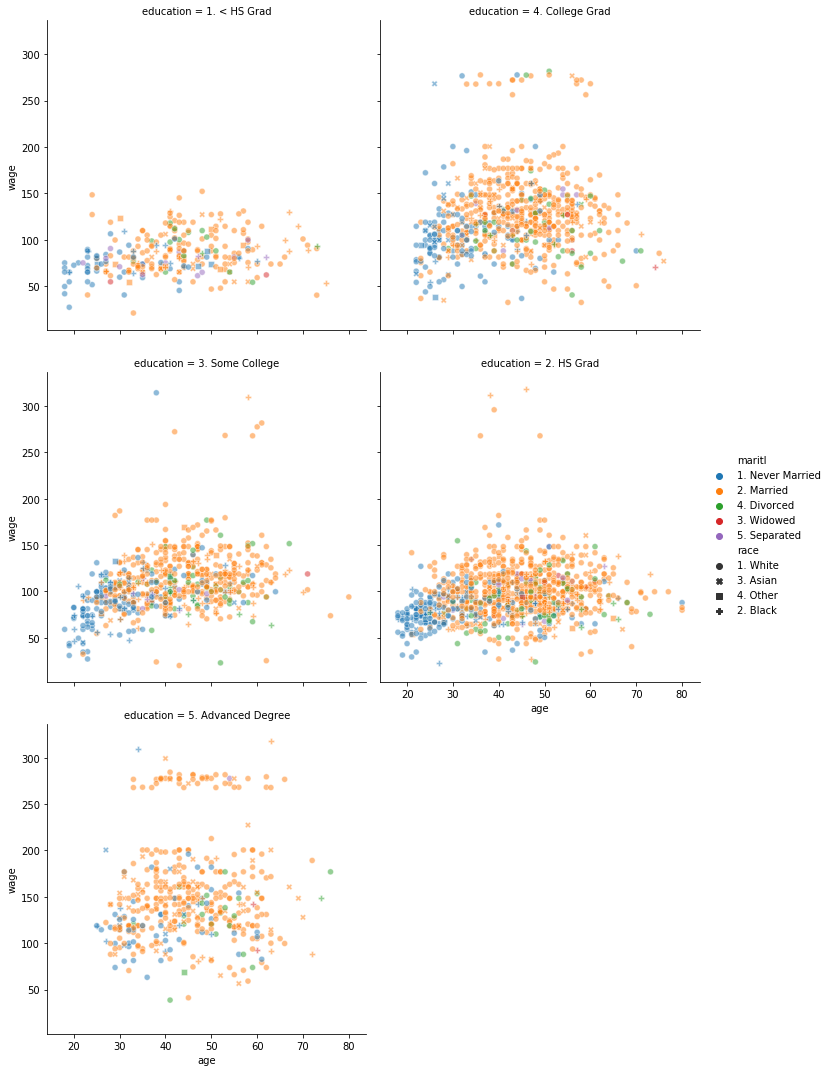

In [142]:
_ = sns.relplot('age', 'wage', hue='maritl', style='race', col='education',
               col_wrap=2, data=Wage, alpha = 0.5)
plt.show()

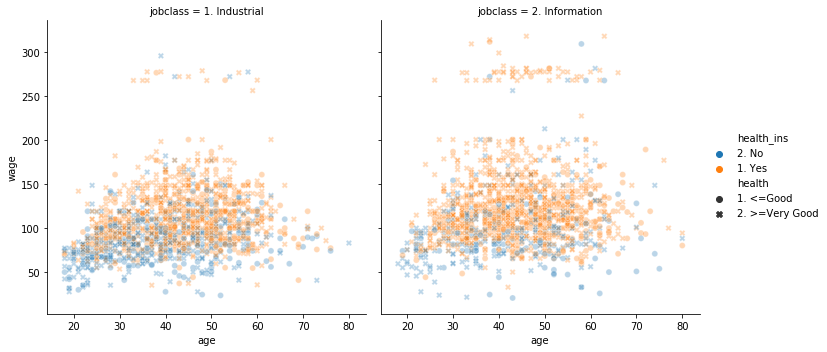

In [144]:
_ = sns.relplot('age','wage',hue='health_ins', style='health', alpha=0.3,
                col='jobclass', data=Wage)
plt.show()

In [145]:
Wage.region.value_counts()

2. Middle Atlantic    3000
Name: region, dtype: int64

In [159]:
y = Wage[['wage']]
X = pd.get_dummies(Wage[['year','age','health','health_ins','maritl','race','jobclass','education']],
                  drop_first=True)

lm_wage = sm.OLS(np.log(y),sm.add_constant(X)).fit()
print(lm_wage.summary())

# to use ANOVA on lm, fit has to be done by formula
import statsmodels.formula.api as smf
lm_wage2 = smf.ols('I(np.log(wage))~year+age+C(health)+C(health_ins)+C(maritl)+C(race)+C(jobclass)+C(education)',
                  data=Wage).fit()
print(lm_wage2.summary())
print(sm.stats.anova_lm(lm_wage2, typ=3))

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sat, 16 Nov 2019   Prob (F-statistic):          7.96e-290
Time:                        18:32:24   Log-Likelihood:                -416.37
No. Observations:                3000   AIC:                             866.7
Df Residuals:                    2983   BIC:                             968.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [169]:
# sklearn has no spline built in, using statsmodels with LOOCV
from statsmodels.gam.api import GLMGam, BSplines
from itertools import product

cv_score = []
params = []
# formula = 'I(np.log(wage))~C(health)+C(health_ins)+C(maritl)+C(race)+C(jobclass)+C(education)'
# changing formula so it shows a best result different than the initial set of parameters
formula = 'wage ~ C(health)+C(health_ins)+C(maritl)+C(race)+C(jobclass)+C(education)'

for df1, df2 in product(range(4,12), repeat=2):
    bs = BSplines(Wage[['year','age']], df=[df1, df2], degree=[3,3])
    gam_bs = GLMGam.from_formula(formula, data=Wage, smoother=bs).fit()
    params.append((df1, df2))
    cv_score.append(gam_bs.cv)
best_score = np.min(cv_score)
best_params = params[np.argmin(cv_score)]
print(best_score)
print(best_params)

bs = BSplines(Wage[['year','age']], df=best_params, degree=[3,3])
gam_bs = GLMGam.from_formula(formula, data=Wage, smoother=bs).fit()
print(gam_bs.summary())

1145.0001284433613
(4, 6)
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   wage   No. Observations:                 3000
Model:                         GLMGam   Df Residuals:                     2977
Model Family:                Gaussian   Df Model:                        22.00
Link Function:               identity   Scale:                          1138.4
Method:                         PIRLS   Log-Likelihood:                -14801.
Date:                Sat, 16 Nov 2019   Deviance:                   3.3890e+06
Time:                        19:18:30   Pearson chi2:                 3.39e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

In [170]:
cv_score

[1146.1501704333973,
 1146.1735692399002,
 1145.0001284433613,
 1145.3602315203698,
 1145.1862999306252,
 1145.7898836978932,
 1146.3882294763498,
 1145.788573195934,
 1146.6205693518696,
 1146.643476176691,
 1145.4560253898255,
 1145.8005626540712,
 1145.6165501410444,
 1146.2116130659922,
 1146.7979167769713,
 1146.238094883733,
 1147.4278087765783,
 1147.4533919826627,
 1146.2714945685814,
 1146.617088041321,
 1146.4338065930217,
 1147.0302267256177,
 1147.61792556843,
 1147.0505385136912,
 1147.346898358324,
 1147.3612187308513,
 1146.306886918577,
 1146.5840511344484,
 1146.3991480465365,
 1147.006090509968,
 1147.5926432240838,
 1147.0280552922302,
 1147.346898358324,
 1147.3612187308513,
 1146.3068869185768,
 1146.5840511344486,
 1146.3991480465363,
 1147.006090509968,
 1147.5926432240838,
 1147.0280552922302,
 1147.346898358324,
 1147.3612187308513,
 1146.3068869185768,
 1146.5840511344484,
 1146.3991480465368,
 1147.006090509968,
 1147.5926432240838,
 1147.0280552922302,
 1147

### 8. Fit some of the non-linear models investigated in this chapter to the `Auto` data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null float64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.0+ KB
None


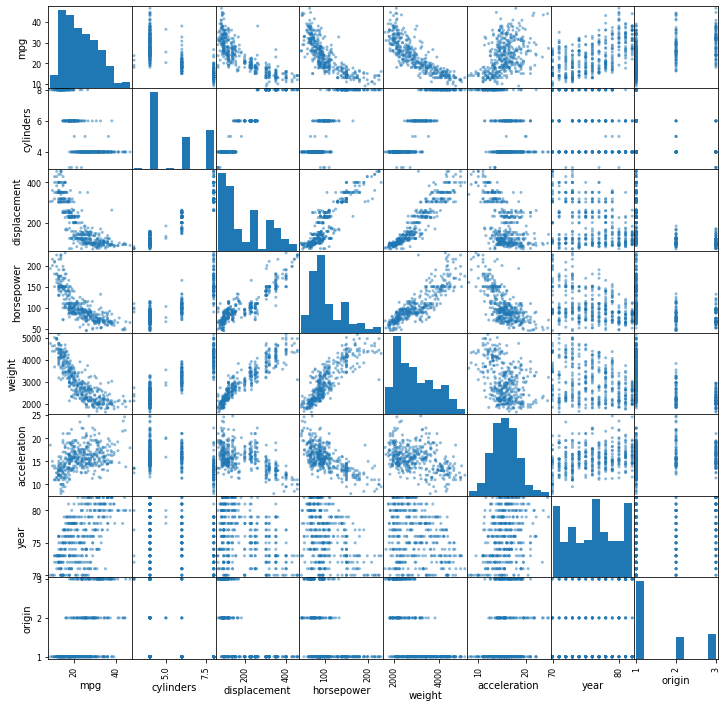

In [186]:
Auto = pd.read_csv('Auto.data', delim_whitespace=True, na_values='?')
print(Auto.info())
pd.plotting.scatter_matrix(Auto, figsize=(12,12))
plt.show()

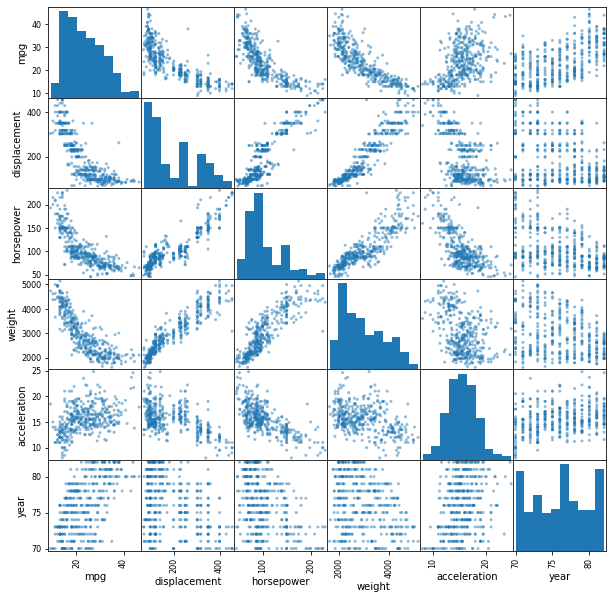

In [189]:
Auto['origin'] = Auto.origin.astype('category')
Auto['cylinders'] = Auto.cylinders.astype('category')
pd.plotting.scatter_matrix(Auto, figsize=(10,10))
plt.show()

Taking $mpg^{-1}$ would likely solve non linearity, but that defeats the purpose of the exploration. Let's explore different preprocessing methods in `Pipeline` instead.

In [200]:
Auto.dropna(inplace=True)

y = Auto.mpg
X = pd.get_dummies(Auto.iloc[:,1:8], drop_first=True)

X.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration', 'year',
       'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8', 'origin_2',
       'origin_3'],
      dtype='object')

In [209]:
[list(z)+[3] for z in product(range(2,3), repeat=4)]

[[2, 2, 2, 2, 3]]

In [212]:
cuts = KBinsDiscretizer()
poly = PolynomialFeatures()
lm = LinearRegression()

pipe = Pipeline([
    # the non_linear stage is populated by the params
    ('non_linear', 'passthrough'),
    ('regress', lm)
])

max_intervals = 10
max_degree = 5

poly_degrees = [i for i in range(1,max_degree+1)]
# cut_bins = [i for i in range(2,max_intervals+1)]
cut_bins = [list(i)+[2,2,2,2,2,2] for i in product(range(2,max_intervals+1), repeat=5)]
cut_strategies = ['uniform', 'quantile', 'kmeans']

params = [
    { # passing through PolynomialFeatures
        'non_linear': [poly],
        'non_linear__degree': poly_degrees,
    },
    { # passing through KBinsDiscretizer
        'non_linear': [cuts],
        'non_linear__n_bins': cut_bins,
        'non_linear__strategy': cut_strategies,
    },
]

folds = 3
rounds = 2

rkf = RepeatedKFold(folds,rounds,46542)
Auto_lm_cv = GridSearchCV(pipe, params, scoring='neg_mean_squared_error', cv=rkf, iid=False, n_jobs=3)
Auto_lm_cv.fit(X,y)
print('Best Parameters: ',Auto_lm_cv.best_params_)
print('Best MSE :', -Auto_lm_cv.best_score_)


Best Parameters:  {'non_linear': KBinsDiscretizer(encode='onehot', n_bins=[5, 9, 7, 3, 10, 2, 2, 2, 2, 2, 2],
                 strategy='kmeans'), 'non_linear__n_bins': [5, 9, 7, 3, 10, 2, 2, 2, 2, 2, 2], 'non_linear__strategy': 'kmeans'}
Best MSE : 7.437371679480997


### 9. This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and `nox` (nitrogen oxides concentration in parts per 10 million) from the `Boston` data. We will treat `dis` as the predictor and `nox` as the response.

#### (a) Use the `poly()` function to fit a cubic polynomial regression to predict `nox` using `dis`. Report the regression output, and plot the resulting data and polynomial fits.

In [214]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [218]:
dis = boston.data[:,7]
nox = boston.data[:,4]
boston.feature_names[[7,4]]

array(['DIS', 'NOX'], dtype='<U7')

In [230]:
poly = PolynomialFeatures(3)
X = poly.fit_transform(dis.reshape(-1, 1))

boston_lm = sm.OLS(nox,X).fit()
print(boston_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.3
Date:                Sun, 17 Nov 2019   Prob (F-statistic):          2.71e-136
Time:                        21:11:14   Log-Likelihood:                 690.44
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9341      0.021     45.110      0.0

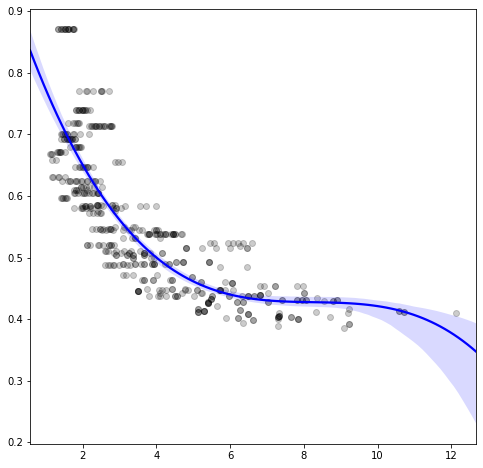

In [237]:
_ = plt.figure(figsize=(8,8))
_ = sns.regplot(dis, nox, order=3, 
                scatter_kws={'color':'black', 'alpha':0.2},
                line_kws={'color':'blue'})
_ = plt.show()

#### (b) Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

Polynomial of degree 1 Residual Sum of Squares: 2.768562858969276
Polynomial of degree 2 Residual Sum of Squares: 2.035261868935257
Polynomial of degree 3 Residual Sum of Squares: 1.9341067071790705
Polynomial of degree 4 Residual Sum of Squares: 1.9329813272985947
Polynomial of degree 5 Residual Sum of Squares: 1.9152899610843042
Polynomial of degree 6 Residual Sum of Squares: 1.8782572985081651
Polynomial of degree 7 Residual Sum of Squares: 1.8494836145829825
Polynomial of degree 8 Residual Sum of Squares: 1.8356296890676962
Polynomial of degree 9 Residual Sum of Squares: 1.8333308045366412
Polynomial of degree 10 Residual Sum of Squares: 1.832171125563325


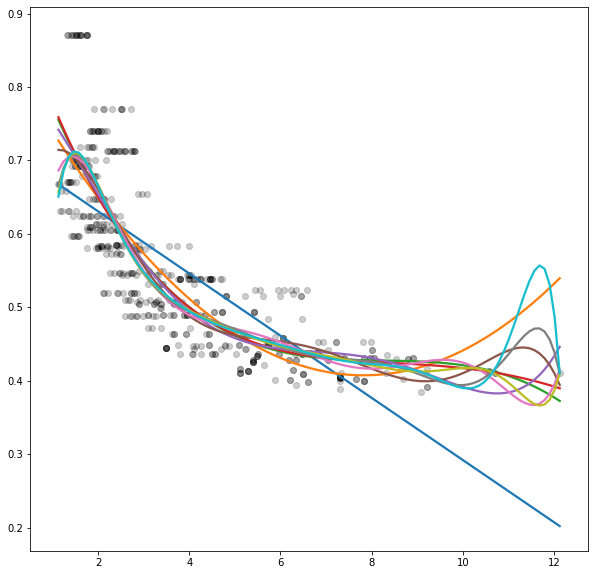

In [244]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
          'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 
          'tab:olive', 'tab:cyan']

lm = LinearRegression()
models = []
SSR = []

_ = plt.figure(figsize = (10,10))
for i in range(10):
    poly = PolynomialFeatures(i+1)
    X = poly.fit_transform(dis.reshape(-1, 1))
    models.append(lm.fit(X,nox))
    y_fit = models[i].predict(X)
    SSR.append(np.sum((nox-y_fit)**2))
    _ = sns.regplot(dis, nox, order=i+1, ci=None, truncate = True,
                scatter_kws={'color':'black', 'alpha':0.02},
                line_kws={'color':colors[i]})
    print(f'Polynomial of degree {i+1} Residual Sum of Squares: {SSR[i]}')
_ = plt.show()

In [4]:
miniBoston <- Boston[,c('nox','dis')]
for (i in 1:10) {
    poly_model <- lm(nox~poly(dis,i,raw=T), data=Boston)
    cat(paste('\nPolynomial of degree', i,
              'Residual Sum of Squares:',
              round(sum(poly_model$residuals**2),3)))
    aux <- data.frame(poly_model$fitted)
    names(aux) <- paste0('degree_',i)
    miniBoston <- cbind(miniBoston, aux)
}


Polynomial of degree 1 Residual Sum of Squares: 2.769
Polynomial of degree 2 Residual Sum of Squares: 2.035
Polynomial of degree 3 Residual Sum of Squares: 1.934
Polynomial of degree 4 Residual Sum of Squares: 1.933
Polynomial of degree 5 Residual Sum of Squares: 1.915
Polynomial of degree 6 Residual Sum of Squares: 1.878
Polynomial of degree 7 Residual Sum of Squares: 1.849
Polynomial of degree 8 Residual Sum of Squares: 1.836
Polynomial of degree 9 Residual Sum of Squares: 1.833
Polynomial of degree 10 Residual Sum of Squares: 1.832

#### (c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

In [247]:
poly = PolynomialFeatures()
lm = LinearRegression()

pipe = Pipeline([
    ('polynomial', poly),
    ('regress', lm),
])

params = {'polynomial__degree':[i+1 for i in range(10)]}

folds = 10
rounds = 100

rkf = RepeatedKFold(folds, rounds, 6735)

nox_cv = GridSearchCV(pipe, params, cv = rkf, n_jobs = 3, iid = False, scoring = 'neg_mean_squared_error')
nox_cv.fit(dis.reshape(-1,1),nox)
print('Best parameter: ',nox_cv.best_params_)
print('Best Score: ',-nox_cv.best_score_)

Best parameter:  {'polynomial__degree': 3}
Best Score:  0.003879621058538925


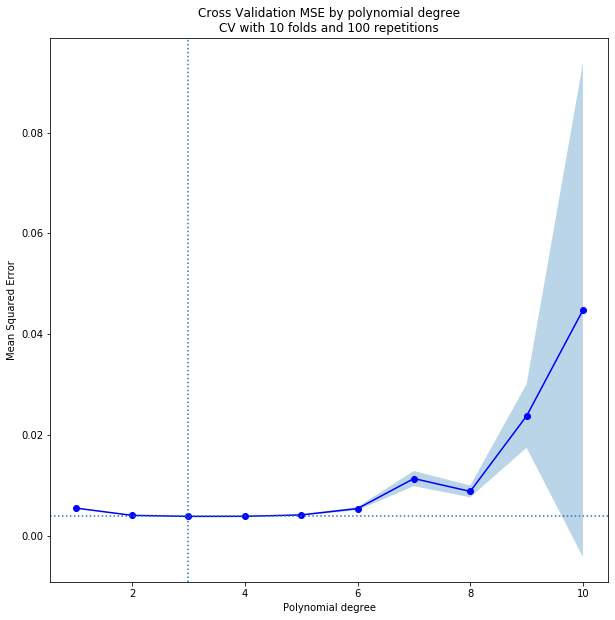

In [251]:
CV_MSE = -nox_cv.cv_results_['mean_test_score']
CV_MSE_SD = nox_cv.cv_results_['std_test_score']/np.sqrt(folds*rounds)
low, high = (CV_MSE - 2 * CV_MSE_SD, CV_MSE + 2 * CV_MSE_SD)

_ = plt.figure(figsize=(10,10))
_ = plt.fill_between(np.arange(1,11), low, high, alpha = 0.3)
_ = plt.plot(np.arange(1,11), CV_MSE, 'bo-')
_ = plt.axhline(CV_MSE.min(), linestyle='dotted')
_ = plt.axvline(nox_cv.best_params_['polynomial__degree'], linestyle='dotted')
_ = plt.title(f'Cross Validation MSE by polynomial degree\nCV with {folds} folds and {rounds} repetitions')
_ = plt.ylabel('Mean Squared Error')
_ = plt.xlabel('Polynomial degree')
_ = plt.show()

#### (d) Use the `bs()` function to fit a regression spline to predict `nox` using `dis`. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.

In [258]:
Boston = pd.DataFrame(boston.data, columns = boston.feature_names)
Boston['MEDV'] = boston.target
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [270]:
bs = BSplines(Boston.DIS, df=[5], degree=[3])
formula = 'nox~1'
Boston_bs = GLMGam.from_formula(formula, data=Boston, smoother=bs).fit()
print(Boston_bs.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    nox   No. Observations:                  506
Model:                         GLMGam   Df Residuals:                      501
Model Family:                Gaussian   Df Model:                         4.00
Link Function:               identity   Scale:                       0.0038379
Method:                         PIRLS   Log-Likelihood:                 691.93
Date:                Mon, 18 Nov 2019   Deviance:                       1.9228
Time:                        11:54:45   Pearson chi2:                     1.92
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7345      0.015     50.306      0.0

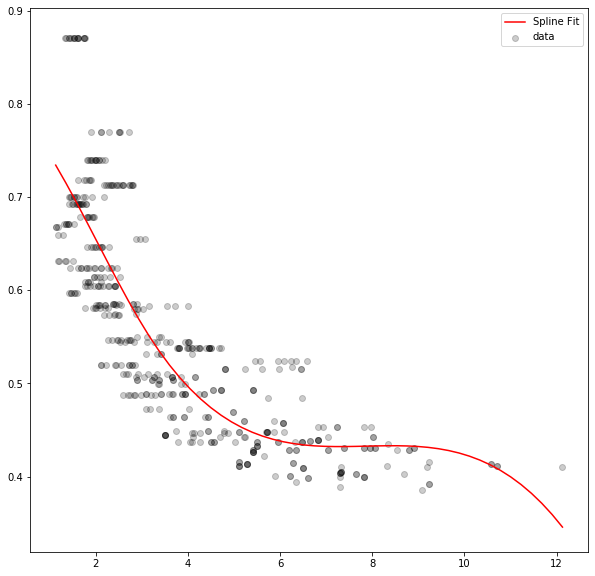

In [280]:
dis_range = np.linspace(np.min(Boston.DIS),np.max(Boston.DIS), 50)
dis_predict = bs.transform(dis_range.reshape(-1,1))
nox_fit_curve = np.dot(sm.add_constant(dis_predict),Boston_bs.params)
_ = plt.figure(figsize = (10,10))
_ = plt.scatter(Boston.DIS, Boston.NOX, color='black', label='data', alpha = 0.2)
_ = plt.plot(dis_range, nox_fit_curve, 'r-', label='Spline Fit')
_ = plt.legend()
_ = plt.show()

#### (e) Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.

#### (f) Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.

Spline fit with 4 degrees of freedom resulted in RSS = 1.9341067071790705.
Spline fit with 5 degrees of freedom resulted in RSS = 1.922774992811925.
Spline fit with 6 degrees of freedom resulted in RSS = 1.8401728014885232.
Spline fit with 7 degrees of freedom resulted in RSS = 1.8339659031602091.
Spline fit with 8 degrees of freedom resulted in RSS = 1.8298844459232841.
Spline fit with 9 degrees of freedom resulted in RSS = 1.8169950567252333.
Spline fit with 10 degrees of freedom resulted in RSS = 1.8256525103870564.
Spline fit with 11 degrees of freedom resulted in RSS = 1.7925348895561335.


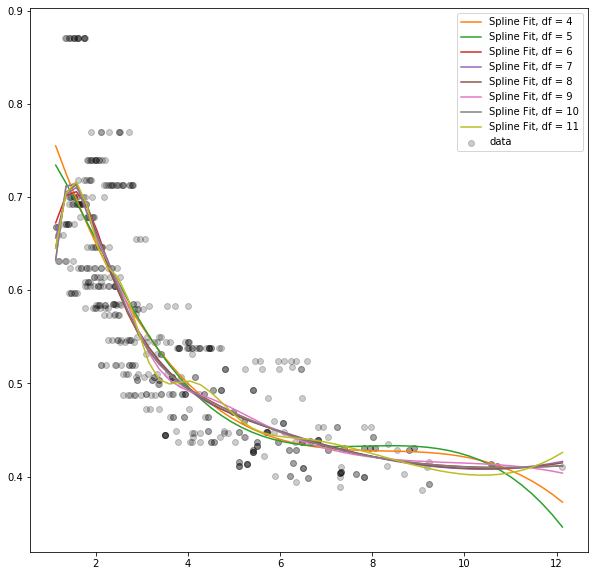

Best LOOCV score: 0.00369321291133435
Best choice of degrees of freedom: 11


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    nox   No. Observations:                  506
Model:                         GLMGam   Df Residuals:                   495.00
Model Family:                Gaussian   Df Model:                        10.00
Link Function:               identity   Scale:                       0.0036213
Method:                         PIRLS   Log-Likelihood:                 709.67
Date:                Mon, 18 Nov 2019   Deviance:                       1.7925
Time:                        13:09:12   Pearson chi2:                     1.79
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

In [286]:
cv_score = []
params = []
formula = 'nox~1' 
dis_range = np.linspace(np.min(Boston.DIS),np.max(Boston.DIS), 50)
_ = plt.figure(figsize = (10,10))
_ = plt.scatter(Boston.DIS, Boston.NOX, color='black', label='data', alpha = 0.2)

for df1 in range(4,12):
    bs = BSplines(Boston.DIS, df=[df1], degree=[3])
    gam_bs = GLMGam.from_formula(formula, data=Boston, smoother=bs).fit()
    params.append(df1)
    cv_score.append(gam_bs.cv)
    dis_predict = bs.transform(dis_range.reshape(-1,1))
    nox_fit_curve = np.dot(sm.add_constant(dis_predict),gam_bs.params)
    _ = plt.plot(dis_range, nox_fit_curve, color = colors[df1-3], label=f'Spline Fit, df = {df1}')
    RSS = np.sum(gam_bs.resid_pearson**2)
    print(f'Spline fit with {df1} degrees of freedom resulted in RSS = {RSS}.')
_ = plt.legend()
_ = plt.show()
    
    
best_score = np.min(cv_score)
best_params = params[np.argmin(cv_score)]

print(f'Best LOOCV score: {best_score}')
print(f'Best choice of degrees of freedom: {best_params}\n\n')

bs = BSplines(Boston.DIS, df=[best_params], degree=[3])
gam_bs = GLMGam.from_formula(formula, data=Boston, smoother=bs).fit()
print(gam_bs.summary())

### 10. This question relates to the `College` data set.

#### (a) Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

In [291]:
College = pd.read_csv('College.csv', index_col=[0])
College.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [292]:
import stepwise_functions as step
dir(step)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add1',
 'all_subsets',
 'combinations',
 'drop1',
 'np',
 'pd',
 'report_best_all',
 'sm',
 'step_back',
 'step_forward']

In [310]:
y = College.Outstate.to_numpy()
feature_names = [i for i in College.columns if i != 'Outstate']
X = pd.get_dummies(College[feature_names], drop_first=True).to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3533488)

results = step.step_forward(sm.OLS, y_traiCn, X_train, crit='BIC')
results.head()

chosen_features = [feature_names[i] for i in range(17) if results.iloc[0,i+3]]
print(chosen_features)

['Private', 'Apps', 'Accept', 'Enroll', 'P.Undergrad', 'PhD', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']


#### (b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

In [314]:
bs = BSplines(College[chosen_features[1:]], 
              df=[6 for i in chosen_features[1:]],
              degree=[3 for i in chosen_features[1:]])
formula = 'Outstate ~ C(Private)'
College_bs = GLMGam.from_formula(formula, data=College, smoother=bs).fit()
print(College_bs.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Outstate   No. Observations:                  777
Model:                         GLMGam   Df Residuals:                   730.00
Model Family:                Gaussian   Df Model:                        46.00
Link Function:               identity   Scale:                      3.4662e+06
Method:                         PIRLS   Log-Likelihood:                -6928.5
Date:                Mon, 18 Nov 2019   Deviance:                   2.5303e+09
Time:                        14:03:05   Pearson chi2:                 2.53e+09
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1255.4524   2265.45

In [316]:
## TO DO 
## GAM Anova

#### (c) Evaluate the model obtained on the test set, and explain the results obtained.

#### (d) For which variables, if any, is there evidence of a non-linear relationship with the response?

### 11. 

In Section 7.7, it was mentioned that GAMs are generally fit using a backfitting approach. The idea behind backfitting is actually quite simple. We will now explore backfitting in the context of multiple linear regression.

Suppose that we would like to perform multiple linear regression, but we do not have software to do so. Instead, we only have software to perform simple linear regression. Therefore, we take the following iterative approach: we repeatedly hold all but one coefficient esti mate fixed at its current value, and update only that coefficient estimate using a simple linear regression. The process is continued until convergence - that is, until the coefficient estimates stop changing.

We now try this out on a toy example.

### (a) Generate a response $Y$ and two predictors $X_1$ and $X_2$ , with $n = 100$.

In [408]:
np.random.seed(3684164)
X = np.random.normal(3,2,(100,2))
y = 12 + np.dot(X,(13,14))

### (b) Initialize $\hat\beta_1$ to take on a value of your choice. It does not matter what value you choose.

In [409]:
hatbeta1 = 0

### (c) Keeping $\hat\beta_1$ fixed, fit the model
$$
Y - \hat\beta_1 X_1 = \beta_0 + \beta_2 X_2 + \varepsilon.
$$
### You can do this as follows:
```
> a = y - beta1 * x1
> beta2 = lm (a∼x2)$coef[2]
```

In [410]:
z = y - hatbeta1*X[:,0]
hatbeta2 = np.polyfit(X[:,1],z,1)[0]

### (d) Keeping $\hat\beta_2$ fixed, fit the model
$$
Y - \hat\beta_2 X_2 = \beta_0 + \beta_1 X_1 + \varepsilon.
$$
### You can do this as follows:
```
> a = y - beta2 * x2
> beta1 = lm(a∼x1)$coef[2]
```

In [411]:
z = y - hatbeta2*X[:,1]
hatbeta1, intercept = np.polyfit(X[:,0],z,1)

[intercept, hatbeta1, hatbeta2]

[15.32291487498243, 12.896598967759797, 12.959360919899531]

### (e) Write a for loop to repeat (c) and (d) 1,000 times. Report the estimates of $\hat\beta_0$ , $\hat\beta_1$ , and $\hat\beta_2$ at each iteration of the for loop. Create a plot in which each of these values is displayed, with $\hat\beta_0$ , $\hat\beta_1$ , and $\hat\beta_2$ each shown in a different color.

In [412]:
iterations = 15
coefficients = []
hatcoef = [0 for i in range(3)]
print(hatcoef)
for i in range(iterations):
    z = y - hatcoef[1]*X[:,0]
    hatcoef[2], hatcoef[0] = np.polyfit(X[:,1],z,1)
    z = y - hatcoef[2]*X[:,1]
    hatcoef[1], hatcoef[0] = np.polyfit(X[:,0],z,1)
    coefficients.append(hatcoef.copy())
    print(hatcoef)

[0, 0, 0]
[15.32291487498243, 12.896598967759797, 12.959360919899531]
[12.026430217547675, 12.999177555887055, 13.991722834225234]
[12.000210223982851, 12.999993458340757, 13.9999341640396]
[12.000001672105938, 12.999999947968133, 13.999999476345666]
[12.000000013299807, 12.999999999586146, 13.999999995834893]
[12.000000000105794, 12.999999999996714, 13.999999999966871]
[12.000000000000842, 12.999999999999979, 13.999999999999737]
[12.000000000000037, 13.000000000000007, 13.999999999999991]
[12.000000000000032, 13.000000000000004, 13.999999999999993]
[12.000000000000025, 13.000000000000004, 13.999999999999995]
[12.000000000000025, 13.000000000000004, 13.999999999999995]
[12.000000000000025, 13.000000000000004, 13.999999999999995]
[12.000000000000025, 13.000000000000004, 13.999999999999995]
[12.000000000000025, 13.000000000000004, 13.999999999999995]
[12.000000000000025, 13.000000000000004, 13.999999999999995]


### (f) Compare your answer in (e) to the results of simply performing multiple linear regression to predict Y using X 1 and X 2 . Use the abline() function to overlay those multiple linear regression coefficient estimates on the plot obtained in (e).

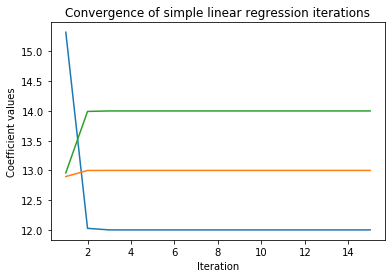

In [417]:
_ = plt.plot(np.arange(iterations)+1,coefficients)
_ = plt.xlabel('Iteration')
_ = plt.ylabel('Coefficient values')
_ = plt.title('Convergence of simple linear regression iterations')
plt.show()

### (g) On this data set, how many backfitting iterations were required in order to obtain a “good” approximation to the multiple regression coefficient estimates?

In [415]:
sm.OLS(y,sm.add_constant(X)).fit().params

array([12., 13., 14.])

2 is good, 3 is almost exact

### 12. This problem is a continuation of the previous exercise. In a toy example with $p = 100$, show that one can approximate the multiple linear regression coefficient estimates by repeatedly performing simple linear regression in a backfitting procedure. How many backfitting iterations are required in order to obtain a “good” approximation to the multiple regression coefficient estimates? Create a plot to justify your answer.

In [418]:
np.random.seed(36874186)
p=100
X = np.random.normal(3,2,(2*p,p))
y = 5 + np.dot(X,np.random.choice(np.arange(1,21),p,replace=True))

mlr_coefficients = sm.OLS(y,sm.add_constant(X)).fit().params

In [419]:
iterations = 200
coefficients = []
hatcoef = [0 for i in range(p+1)]

for i in range(iterations):
    for j in range(p):
        z = y - np.dot(np.delete(X,j,1), np.delete(hatcoef, (0,j+1)))
        hatcoef[j+1], hatcoef[0] = np.polyfit(X[:,j],z,1)
    coefficients.append(hatcoef.copy())

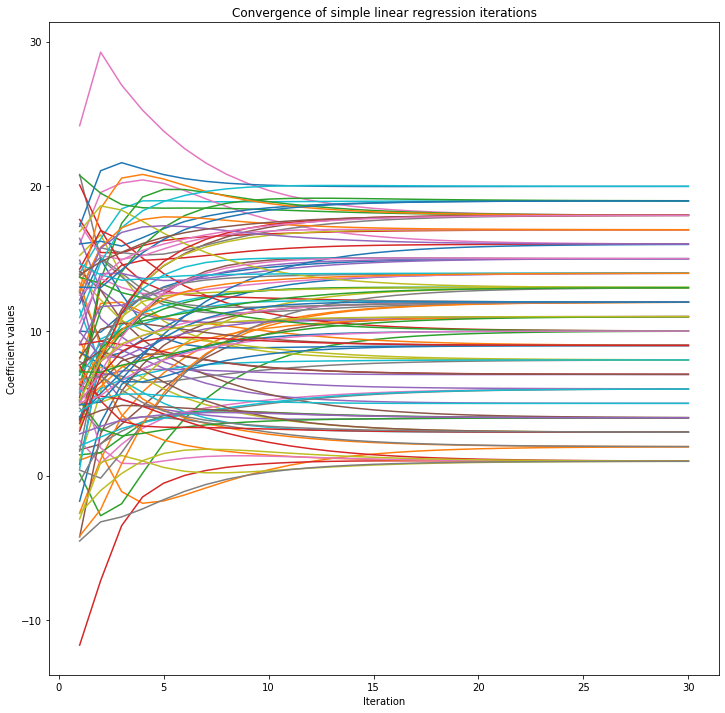

In [420]:
to_show = 30
_ = plt.figure(figsize=(12,12))
_ = plt.plot(np.arange(to_show)+1, np.array(coefficients)[:to_show,1:])
_ = plt.xlabel('Iteration')
_ = plt.ylabel('Coefficient values')
_ = plt.title('Convergence of simple linear regression iterations')
plt.show()